# Data Science Project: Assessment 3

Student ID: 201570749

This assessment has a 60% weight.

## Case study

BitsBank wants to catch suspicious credit card transactions for further fraud investigation. The bank decided to invest in a new system and tasked you with the mission of building a prediction model that is capable of detecting potential fraudulent transactions. Their budget for the system is £1million. The bank provided us with their historical transactions data. Each record constitutes a set of attributes for each transaction with a flag of either being normal or fraudulent. The original attributes have been passed through a PCA process that gave the set of features that we see in the dataset. This has been done for two reasons: firstly to reduce the dimensionality of the dataset, and secondly to anonymise the information of their customers. Fraudulent cases constitute a small percentage of the overall transactions. [The dataset can be downloaded here](https://minerva.leeds.ac.uk/bbcswebdav/xid-18675934_4).  

Each case that is nominated by your predictive model to be fraudulent and turns out to be not fraudulent costs the bank around £1k. Such cases harm the bank’s customer satisfaction ratings. The bank is willing to allow an annual budget for these cases of £30k. (Hint: constitutes false positives.) 

Each case that is not nominated by your predictive model to be fraudulent and turns out to be fraudulent costs the bank £10k on average. Such cases harm the bank’s reputation and costs them future customers. The bank is willing to allow an annual budget for these cases of £50k. (Hint: constitutes false negatives.)

Their main requirements are: 

1. to catch at least 90% of actual fraudulent cases 

2. to ensure that at least 70% of the predicted cases for further investigation are actually fraudulent.



## 1. Aims, objectives and plan

### a) Aims and objectives (2 marks)
Although we have already stated what is required, please formally state the aims and objectives of the project in your own words.

100-200 words

Our client, BitsBank tasked us to identify fraudulent credit card transactions with a predictive model, based on the data provided. This is an important infrastructural project that has long-ranging consequences, if done incorrectly, so there are further constraints that were defined:

Each False Positive costs the bank £1,000, each False Negative costs the bank £10,000. Because of this disparity, “Recall” is more important than overall accuracy or precision or accuracy during evaluation.
The budget allows for 5 False Negative per year, and 30 False Positives.

The absolute minimum requirements are:

True Positive Rate (Specificty = True Positives / True Positives + False Negatives) of at least 90%.

True Negative Rate (Sensitivity, Recall = True Negatives / True Negatives + False Positives) of at least 70%.



###  b) Plan (2 marks)
Please demonstrate how you have conducted the project with a simple Gantt chart.

![Gantt chart](gantt.png)

## 2. Understanding the case study

###  Case study analysis (8 marks)
State the key points that you found in the case and how you intend to deal with them appropriately to address the bank's needs. (You can include more than four points.)

200-300 words

1. The dataset is relatively small, and very imbalanced: there are 9997 rows and 32 columns, and frauduluent transactions only make up around 5% it. We used stratified sampling when splitting the dataset into training/test set (50-50%).
2. In the cleaning phase, I removed one duplicate column, as well as the ambigiuous "Time" column, to avoid introducing any kind of bias into the predictive model, as well as changed the labeling convention by mapping "Normal transactions" to "Fraudulent transactions".
3. There were 4 rows - out of close to 10,000, so less than 0.1% of the dataset - removed as they had missing (nan) values in one column ("V1")
4. The dataset then was normalized using SKLearn's "StandardScaler", as none of the chosen classifiers would be effective without it.
5. A Logistic Regressor was fitted as a baseline classifier, and produced a macro F1 score of 0.9846.
6. To improve the performance of the model, I ran Grid Search on the potential hyperparameter combinations.
7. Multi-Layered Perceptron was fitted as the second classifier, which outperformed Logistic Regression.
8. The hyperparameter search phase has improved the scores of MLP slightly.
9. I ran k-fold cross-validation on the dataset, confirming the previous results - it does look like MLP improved on LC's score, without overfitting to the dataset.


## 3. Pre-processing applied 
Enter the code in the cells below to execute each of the stated sub-tasks. 


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report, accuracy_score, recall_score, precision_score, confusion_matrix, balanced_accuracy_score, plot_confusion_matrix, f1_score, make_scorer, roc_auc_score, plot_roc_curve, plot_precision_recall_curve


In [2]:
data = pd.read_csv("creditcard_dataset_small.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V28.1,Amount,Normal
0,18088,NaN,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,...,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,-0.775036,1218.89,0
1,101051,NaN,-1.093377,-0.059768,1.064785,11.095089,-5.430971,-9.378025,-0.446456,1.992110,...,-1.259697,-15.981649,-0.883670,-3.536716,-0.592965,0.675525,0.424849,0.424849,0.92,0
2,132688,NaN,1.861373,-4.310353,2.448080,4.574094,-2.979912,-2.792379,-2.719867,-0.276704,...,-0.348904,-3.979948,-0.828156,-2.419446,-0.767070,0.387039,0.319402,0.319402,1.00,0
3,95559,NaN,11.614801,-19.739386,10.463866,-12.599146,-1.202393,-23.380508,-5.781133,-7.811022,...,1.140910,1.392953,0.348997,-2.167510,-0.798754,-2.942775,-0.462680,-0.462680,1.63,0
4,58642,-0.451383,2.225147,-4.953050,4.342228,-3.656190,-0.020121,-5.407554,-0.748436,-1.362198,...,0.495889,1.154128,-0.016186,-2.079928,-0.554377,0.455179,0.001321,0.001321,113.92,0


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V28.1,Amount,Normal
count,9997.000000,9993.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,...,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,117482.405122,-1.242894,-0.388124,-0.578172,0.385147,0.175060,0.036553,-0.147936,-0.225813,-0.206448,...,0.263301,-0.093483,-0.029535,-1.295028,-0.071748,0.038500,0.039641,0.039641,207.815347,0.950785
std,41963.235383,3.061600,3.543063,2.781635,2.118301,2.584163,1.833762,2.874139,2.511277,1.346458,...,1.045465,1.984314,0.661193,0.567101,0.585584,0.845138,0.579283,0.579283,679.652086,0.216327
min,38.000000,-46.855047,-63.344698,-31.103685,-5.266509,-29.730600,-23.496714,-43.557242,-50.688419,-13.434066,...,-10.933144,-44.807735,-2.727935,-10.295397,-2.604551,-22.565679,-11.710896,-11.710896,0.000000,0.000000
25%,89317.000000,-1.270388,-0.696123,-1.183218,-0.864526,-0.548204,-0.818892,-0.527063,-0.334373,-0.860413,...,-0.329913,0.013697,-0.400808,-1.479027,-0.461654,-0.111830,-0.040829,-0.040829,8.920000,1.000000
50%,130158.000000,-0.450542,0.253052,0.043928,-0.136180,0.250966,-0.098374,0.182848,0.030407,-0.126675,...,0.259437,0.199210,0.031952,-1.207582,-0.079085,0.116164,0.135698,0.135698,34.950000,1.000000
75%,148479.000000,-0.028482,0.848351,0.856952,1.130185,1.087469,0.772079,0.817359,0.431064,0.553565,...,0.961447,0.405948,0.492264,-1.057593,0.263174,0.273851,0.264816,0.264816,125.900000,1.000000
max,172782.000000,2.132386,22.057729,9.382558,16.875344,34.099309,21.307738,31.527244,20.007208,15.594995,...,8.361985,5.466230,3.340880,2.208209,3.004455,10.507884,13.999688,13.999688,19656.530000,1.000000


In [4]:
data.shape

(9997, 32)

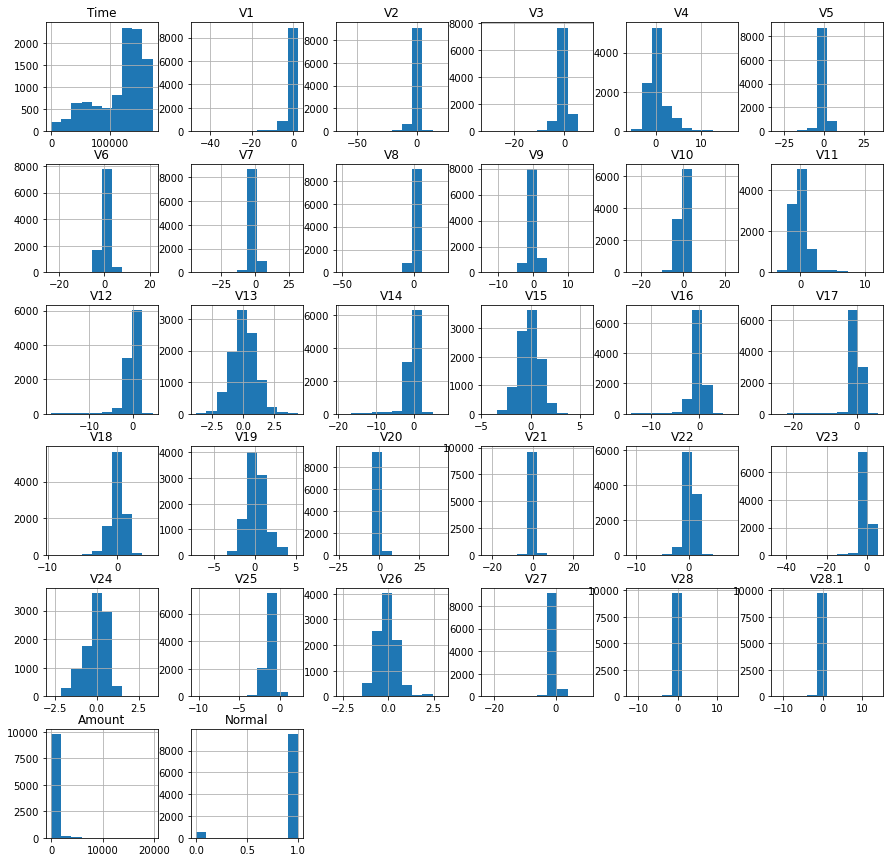

In [5]:
data.hist(figsize=(15,15));

It looks like there are some features that are quite skewed (like V4, V16, V23). The most important is the label, "Normal", which is very imbalanced.

Fraudulent transactions: 492
Normal transactions: 9505
Proportion: 19.32 : 1


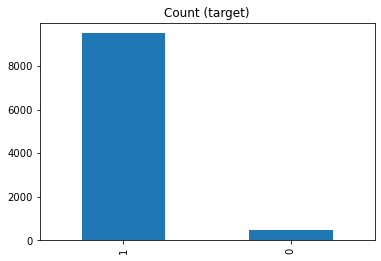

In [6]:
label_count = data["Normal"].value_counts()
print('Fraudulent transactions:', label_count[0])
print('Normal transactions:', label_count[1])
print('Proportion:', round(label_count[1] / label_count[0], 2), ': 1')

label_count.plot(kind='bar', title='Count (target)');

In this case study, Fraudulent transaction is our positive class, and normal transaction is the negative class. Hence I'm creating another column "Fraudulent (Transactions)" which would be the inversion of the column "Normal (Transactions)".

In [7]:
data['Fraudulent'] = data['Normal'].map({0: 1, 1: 0})
data = data.drop('Normal', axis = 1)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V28.1,Amount,Fraudulent
0,18088,NaN,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,...,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,-0.775036,1218.89,1
1,101051,NaN,-1.093377,-0.059768,1.064785,11.095089,-5.430971,-9.378025,-0.446456,1.992110,...,-1.259697,-15.981649,-0.883670,-3.536716,-0.592965,0.675525,0.424849,0.424849,0.92,1
2,132688,NaN,1.861373,-4.310353,2.448080,4.574094,-2.979912,-2.792379,-2.719867,-0.276704,...,-0.348904,-3.979948,-0.828156,-2.419446,-0.767070,0.387039,0.319402,0.319402,1.00,1
3,95559,NaN,11.614801,-19.739386,10.463866,-12.599146,-1.202393,-23.380508,-5.781133,-7.811022,...,1.140910,1.392953,0.348997,-2.167510,-0.798754,-2.942775,-0.462680,-0.462680,1.63,1
4,58642,-0.451383,2.225147,-4.953050,4.342228,-3.656190,-0.020121,-5.407554,-0.748436,-1.362198,...,0.495889,1.154128,-0.016186,-2.079928,-0.554377,0.455179,0.001321,0.001321,113.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,147602,-0.458892,2.004546,-3.721789,0.298443,0.247307,-1.977842,1.798866,0.173564,-0.343356,...,1.399577,0.092475,-0.120967,-0.970651,-0.387655,0.542640,0.347002,0.347002,165.93,0
9993,67999,0.122444,0.069571,0.764500,-1.503765,-0.443803,0.017921,0.061275,-0.008733,1.498650,...,1.227407,-0.016076,-0.334869,-0.970630,0.067214,0.142256,0.161656,0.161656,39.90,0
9994,137567,0.427541,1.908517,-0.497120,4.744798,1.816444,1.282597,0.724167,0.122382,-1.710136,...,-0.520801,0.211041,-1.317289,-0.970590,0.103664,0.070420,-0.152780,-0.152780,8.01,0
9995,47339,0.801397,-0.220488,-1.271437,-1.158426,2.349269,3.018820,-0.281505,0.560514,0.311328,...,-0.195452,0.438894,1.044247,-0.970550,0.816832,-0.385789,-0.381517,-0.381517,4.42,0


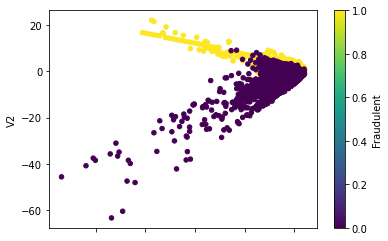

In [8]:
data.plot.scatter(x = 'V1', y = 'V2', c = 'Fraudulent', colormap='viridis');

In [9]:
transactions_normal = data[data["Fraudulent"] == 1]
transactions_fraudulent = data[data["Fraudulent"] == 0]

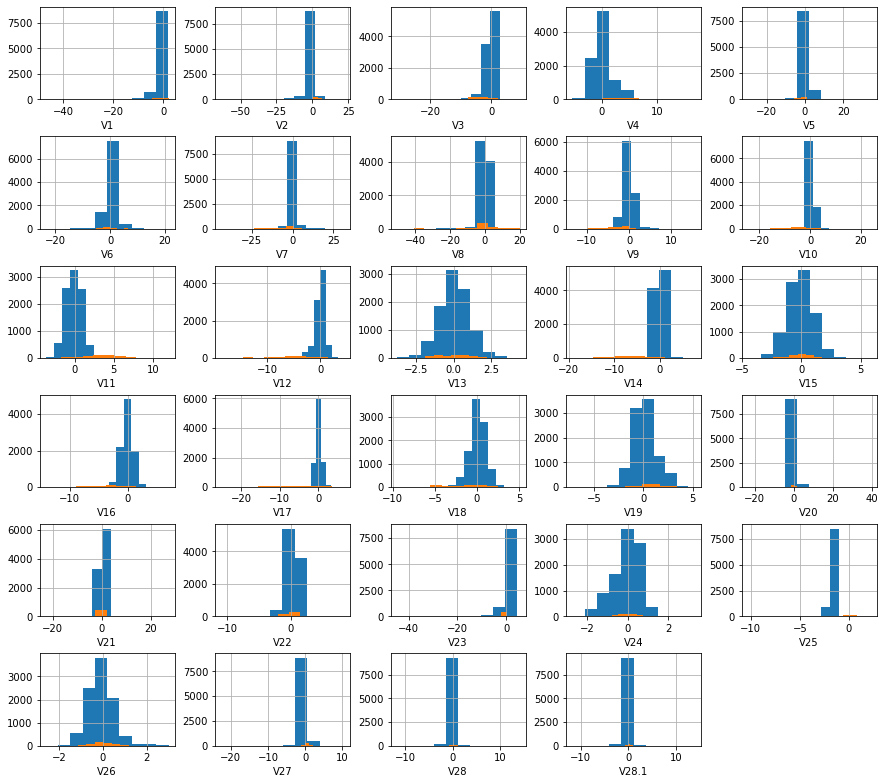

In [10]:
fig = plt.figure(figsize=(15,35))
fig.subplots_adjust(hspace=0.4, wspace=0.3)
no_of_columns = len(data.columns)
for i in range(1, 30):
    ax = fig.add_subplot(15, 5, i)
    ax.set_xlabel(data.columns[i], fontsize=10)
    transactions_fraudulent[transactions_fraudulent.columns[i]].hist(ax = ax)
    transactions_normal[transactions_normal.columns[i]].hist(ax = ax)

As a potential alternative step, I could transform some of the features to have a more normal-like distribution, but this was out of scope for the current project.

###  a) Preparing the labels appropriately (4 marks)

Because of the large imbalance between "Normal" and "Fraudulent" transactions, I'd want to use stratified sampling when splitting the dataset into a test and a train set (50%-50%).

In [11]:
X = data.drop('Fraudulent', axis = 1)
y = data['Fraudulent']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5, random_state= 1, stratify = y)

In [13]:
print("Number of examples in the training set: ", X_train.shape[0])
print("Number of examples in the test set: ", X_test.shape[0])


Number of examples in the training set:  4998
Number of examples in the test set:  4999


In [14]:
y_test.value_counts()

0    4753
1     246
Name: Fraudulent, dtype: int64

In [15]:
y_train.value_counts()

0    4752
1     246
Name: Fraudulent, dtype: int64

There are also alternatives: undersampling normal transactions, oversampling fraudulent transactions. 

###  b) Removing synonymous and noisy attributes (4 marks)


In [16]:
X_train.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V28.1,Amount
Time,1.000000,0.147423,-0.052598,0.004520,-0.223210,0.142417,0.064188,0.164763,-0.008724,0.048790,...,-0.005869,0.095973,0.090197,-0.058970,-0.176689,-0.069484,0.015692,0.070416,0.070416,-0.021125
V1,0.147423,1.000000,0.431919,0.722983,-0.490919,0.350232,0.140087,0.350852,0.068180,0.107194,...,0.024124,0.231259,0.464728,-0.080552,0.015438,0.099813,-0.000804,0.207791,0.207791,-0.368867
V2,-0.052598,0.431919,1.000000,0.040060,-0.107293,-0.119249,0.031309,-0.343024,0.010876,-0.289306,...,-0.118552,0.345321,0.456009,-0.045523,0.387424,0.102419,-0.069742,0.066958,0.066958,-0.657561
V3,0.004520,0.722983,0.040060,1.000000,-0.460645,0.537140,0.072296,0.364630,-0.046717,0.409457,...,-0.020233,0.101824,0.238572,-0.023445,-0.215058,0.015222,-0.044901,0.032846,0.032846,-0.322431
V4,-0.223210,-0.490919,-0.107293,-0.460645,1.000000,-0.230975,-0.072213,-0.252192,0.063336,-0.321040,...,0.063470,-0.169855,-0.249923,0.048475,0.136600,0.077115,0.042592,-0.084582,-0.084582,0.250380
V5,0.142417,0.350232,-0.119249,0.537140,-0.230975,1.000000,-0.315846,0.027018,-0.040081,0.298718,...,-0.010890,0.105639,0.059998,-0.043324,-0.179154,-0.006934,0.081402,-0.065111,-0.065111,-0.413286
V6,0.064188,0.140087,0.031309,0.072296,-0.072213,-0.315846,1.000000,0.328759,-0.238119,0.059859,...,-0.094306,0.017295,0.052652,-0.147198,-0.100880,0.040929,-0.123318,0.091177,0.091177,0.272304
V7,0.164763,0.350852,-0.343024,0.364630,-0.252192,0.027018,0.328759,1.000000,0.082232,0.364575,...,0.134143,-0.079058,0.011314,-0.009758,-0.203449,-0.037055,-0.077880,0.102791,0.102791,0.367745
V8,-0.008724,0.068180,0.010876,-0.046717,0.063336,-0.040081,-0.238119,0.082232,1.000000,-0.053351,...,0.276719,-0.111218,0.116213,-0.047828,0.189836,0.035716,0.095519,0.053664,0.053664,-0.105668
V9,0.048790,0.107194,-0.289306,0.409457,-0.321040,0.298718,0.059859,0.364575,-0.053351,1.000000,...,0.098999,-0.096979,-0.117837,0.017207,-0.322085,-0.097215,-0.190009,-0.085990,-0.085990,0.027890


It looks like column "V28" and "V28.1" have correllation of 1, so they're duplicates, so it's safe to remove 28.1.


In [17]:
X_train = X_train.drop("V28.1", axis = 1)
X_test = X_test.drop("V28.1", axis = 1)


Because I don't have meaningful information about the "Time" column, it's better to drop it: I don't know whether we'd introduce any kind of bias by leaving it in when re-scaling the dataset.
It doesn't look like "Time" means seconds past midnight, as there are only 86400 seconds in a day, while its maximum value is 172782.

In [18]:
X_train = X_train.drop("Time", axis = 1)
X_test = X_test.drop("Time", axis = 1)


###  c) Dealing with missing values (4 marks)


In [19]:
print("Number of rows in the training set: ", X_train.shape[0])
train_rows_without_nan = X_train[~np.isnan(X_train).any(axis=1)]
print("Number of rows in the training set after removing nan values: ", train_rows_without_nan.shape[0])

print("Number of rows in the test set: ", X_test.shape[0])
test_rows_without_nan = X_test[~np.isnan(X_test).any(axis=1)]
print("Number of rows in the test set after removing nan values: ", test_rows_without_nan.shape[0])


Number of rows in the training set:  4998
Number of rows in the training set after removing nan values:  4995
Number of rows in the test set:  4999
Number of rows in the test set after removing nan values:  4998


There are only a couple of rows missing from the training/test set after removing the ones containing NaN values. This makes it relatively easy to 

In [20]:
train_nan_mask = np.isnan(X_train).any(axis=1)
X_train = X_train[~train_nan_mask]
y_train = y_train[~train_nan_mask]
test_nan_mask = np.isnan(X_test).any(axis=1)
X_test = X_test[~test_nan_mask]
y_test = y_test[~test_nan_mask]

###  d) Rescaling if necessary (4 marks)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4. Technique (part 1)

### a) Discuss your motivation for choosing the technique and provide a schematic figure of the process (8 marks)

100-200 words


I chose to run Logistic Regression first, as a baseline classifier, with the hope that if there are a effective linear decision surfaces, it'll find them. This would be one of the simplest predictive model we could have, which I think makes it a good first choice.

There has been already a reasonable amount of feature engineering (rescaling, removal of synonymous features) that was done to make sure that Logistic Regression can run successfully - without that, it'd not have a great chance.

The most important hyperparameter for Logistic Regression Classifier is "C", which (inversely) controls the regularization strength (smaller value means stronger regularization).

![Logistic Regression](LR.png)


Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters (rationale) (4 marks)


I've choosen l1 penalty, where C = 0.1, as the standard Logistic Regression hyperparameters. I also extended the maximum number of epochs slightly, to make it a fair comparison to MLP later, where I also did the same.

In [22]:
log = LogisticRegression(solver = 'liblinear', penalty = 'l1', C = 0.1, random_state= 1, max_iter=200)
log.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=200, penalty='l1', random_state=1,
                   solver='liblinear')

In [23]:
def print_scores(name, classifier, target, X_test):
    predicted = classifier.predict(X_test)
    print("-- ", name, " --")
    print("Accuracy: ", round(accuracy_score(predicted, target), 4))
    print("Balanced Accuracy: ", round(balanced_accuracy_score(predicted, target), 4))
    print("Recall: ", round(recall_score(predicted, target), 4))
    print("Precision: ", round(precision_score(predicted, target), 4))
    print("Macro F1 score: ", round(f1_score(predicted, target, average = 'macro'), 4))
    plot_confusion_matrix(estimator = classifier, X = X_test, y_true= target)

--  Baseline Logistic Regression  --
Accuracy:  0.9972
Balanced Accuracy:  0.9985
Recall:  1.0
Precision:  0.9429
Macro F1 score:  0.9846


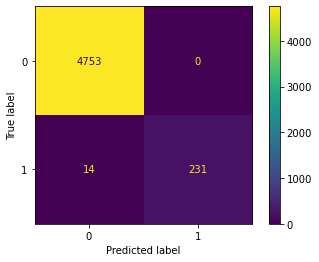

In [24]:
print_scores("Baseline Logistic Regression", log, y_test, X_test)

### c) Optimising hyper parameters (4 marks) 


I'm interested in improving the baseline Logistic Regression model by doing a grid search of the hyperparameter space. This means SKLearn's GridSearchCV trains separate models for each combination of the given hyperparameter options, and compares them based (based on their F1 score in this case). 

In [25]:
scorer = make_scorer(f1_score)
log_parameters = {'penalty':('l1', 'l2'), 'solver': ['liblinear'], 'C': (0.01,0.1,1,10,100,1000) }

log_grid = GridSearchCV(log, scoring = scorer, param_grid = log_parameters, n_jobs = -1)
log_grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(C=0.1, max_iter=200, penalty='l1',
                                          random_state=1, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': (0.01, 0.1, 1, 10, 100, 1000),
                         'penalty': ('l1', 'l2'), 'solver': ['liblinear']},
             scoring=make_scorer(f1_score))

In [26]:
log_grid.best_estimator_.get_params()

{'C': 10,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### d) Performance metrics for training (4 marks)

--  Optimized Logistic Regression  --
Accuracy:  0.9988
Balanced Accuracy:  0.9936
Recall:  0.9878
Precision:  0.9878
Macro F1 score:  0.9936


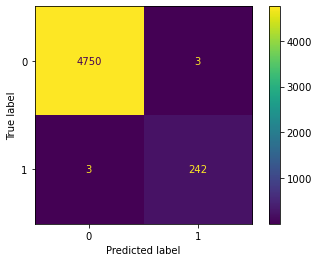

In [27]:
print_scores("Optimized Logistic Regression", log_grid.best_estimator_, y_test, X_test)

## 5. Technique (part 2)

### a) Discuss your motivation for choosing the technique and  provide a schematic figure of the process (8 marks)

100-200 words


I've chosen Multi Layer Perceptron as the second learning algorithm to evaluate, as it's an extension of Logistic Regression:

Both have the same underlying structure and trained in a very similar way, but a Multi-Layer Perceptron also contains one or more hidden layers, making it able to pick up non-linear relationships as well.
It's an interesting comparison, because I can also learn about the underlying structure of the fraudulent transactions - if MLP is more successful than the Logistic Regression, it may mean that the fraudulent transactions can not be linearly separated in the n dimensional feature space we have.

I'm also really interested whether the non-linearity MLP could pick up may just mean it'll overfit to the data - something I'll definitely find out during k-Fold cross validation!

![MLP](MLP.png)

### b) Setting hyper parameters (rationale) (4 marks)


--  Baseline MLP  --
Accuracy:  0.9984
Balanced Accuracy:  0.9992
Recall:  1.0
Precision:  0.9673
Macro F1 score:  0.9913


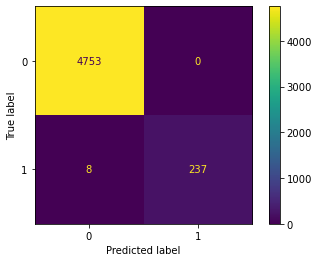

In [28]:
mlp = MLPClassifier(random_state= 1, hidden_layer_sizes=(64,24), max_iter = 300)
mlp.fit(X_train, y_train)
print_scores("Baseline MLP", mlp, y_test, X_test)

The baseline MLP classifier I picked has two hidden layers, with 64 and 24 neurons each. I've fixed its random state, as well as increased the maximum number of epochs to 300, and left the activation function ReLU.

### c) Optimising hyper parameters (4 marks)


In [29]:
scorer = make_scorer(f1_score)
mlp_parameters = {'hidden_layer_sizes':((24,), (48,), (96,), (144,), (24,12), (48, 24), (96, 48), (144, 96), (24,12,6), (48, 24, 12), (96, 48, 24), (144, 96, 24),), 'activation': ['relu', 'logistic', 'tanh' ], 'learning_rate': ['constant', 'adaptive']}
mlp_grid = GridSearchCV(mlp, scoring = scorer, param_grid = mlp_parameters, n_jobs = -1)
mlp_grid.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(hidden_layer_sizes=(64, 24), max_iter=300,
                                     random_state=1),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'hidden_layer_sizes': ((24,), (48,), (96,), (144,),
                                                (24, 12), (48, 24), (96, 48),
                                                (144, 96), (24, 12, 6),
                                                (48, 24, 12), (96, 48, 24),
                                                (144, 96, 24)),
                         'learning_rate': ['constant', 'adaptive']},
             scoring=make_scorer(f1_score))

In [30]:
mlp_grid.best_estimator_.get_params()

{'activation': 'logistic',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (24, 12, 6),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 300,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

### d) Performance metrics for training (4 marks)

--  Optimized Multi-Layer Perceptron  --
Accuracy:  0.999
Balanced Accuracy:  0.9956
Recall:  0.9918
Precision:  0.9878
Macro F1 score:  0.9946


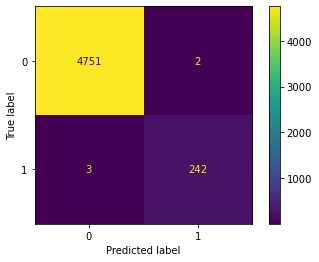

In [31]:
print_scores("Optimized Multi-Layer Perceptron", mlp_grid.best_estimator_, y_test, X_test)

## 6. Comparison of metrics performance for testing 
Enter the correct code in the cells below to execute each of the stated sub-tasks. 


### a) Use of cross validation for both techniques to deal with over-fitting (4 marks)

I'll use k-Fold cross validation to compare the models' performance and tendency to overfit, with SKLearn's "cross_validate" function.
This will take the dataset and split it into n groups, and always use one of the groups as the test set, and the remaining as training set. It repeats this n times, and compares the individually trained models' performance.

Overall, we'll be making decisions based on the average score of all models - as well as the standard deviation (distribution) of those scores.

In [32]:
# Preprocess the whole data
X_preprocessed = X.drop(["V28.1", "Time"], axis = 1)
y_preprocessed = y.copy()
whole_nan_mask = np.isnan(X_preprocessed).any(axis=1)
X_preprocessed = X_preprocessed[~whole_nan_mask]
y_preprocessed = y_preprocessed[~whole_nan_mask]
X_preprocessed = scaler.transform(X_preprocessed)

In [39]:

from sklearn.model_selection import cross_validate
scoring = ['f1_macro', 'recall_macro']
log_baseline_scores = cross_validate(log, X_preprocessed, y_preprocessed, cv=5, scoring=scoring, n_jobs = -1)
log_optimized_scores = cross_validate(log_grid.best_estimator_, X_preprocessed, y_preprocessed, cv=5, scoring=scoring, n_jobs = -1)
mlp_baseline_scores = cross_validate(mlp, X_preprocessed, y_preprocessed, cv=5, scoring=scoring, n_jobs = -1)
mlp_optimized_scores = cross_validate(mlp_grid.best_estimator_, X_preprocessed, y_preprocessed, cv=5, scoring=scoring, n_jobs = -1)

`cross_validate` uses Stratified K-fold sampling by default, when `cv` is an integer and the estimator is a classifier.

### b) Comparison with appropriate metrics for testing (8 marks)

In [40]:
def print_cv_scores(name, scores):
    print("\n-- ", name, " --")
    print("Macro f1 score: ", round(scores["test_f1_macro"].mean(), 4), ", std: ", round(scores["test_f1_macro"].std(), 4))
    print("Macro recall score: ", round(scores["test_recall_macro"].mean(), 4), ", std: ", round(scores["test_recall_macro"].std(), 4))

print_cv_scores("Baseline Logistic Regression", log_baseline_scores)
print_cv_scores("Optimized Logistic Regression", log_optimized_scores)

print_cv_scores("Baseline MLP ", mlp_baseline_scores)
print_cv_scores("Optimized MLP ", mlp_optimized_scores)


--  Baseline Logistic Regression  --
Macro f1 score:  0.9475 , std:  0.0889
Macro recall score:  0.9265 , std:  0.1187

--  Optimized Logistic Regression  --
Macro f1 score:  0.9873 , std:  0.0205
Macro recall score:  0.9814 , std:  0.0366

--  Baseline MLP   --
Macro f1 score:  0.9897 , std:  0.0167
Macro recall score:  0.9836 , std:  0.0301

--  Optimized MLP   --
Macro f1 score:  0.9873 , std:  0.0132
Macro recall score:  0.9872 , std:  0.0243


### c) Model selection (ROC or other charts) (4 marks)

Precision-Recall curves are more approriate to use when there's a class imbalance.

Nevertheless, the classifiers are so close in terms of performance, that I can barely notice the difference on the charts.

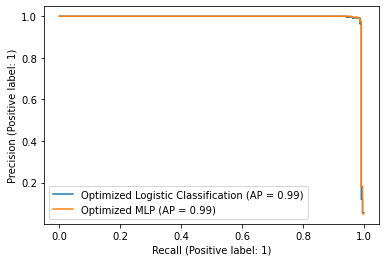

In [41]:
# Precision-Recall Curves
ax = plt.axes()
plt2 = plot_precision_recall_curve(log_grid.best_estimator_, X_test, y_test, ax = ax, name = "Optimized Logistic Classification")
plt4 = plot_precision_recall_curve(mlp_grid.best_estimator_, X_test, y_test, ax = ax, name = "Optimized MLP")

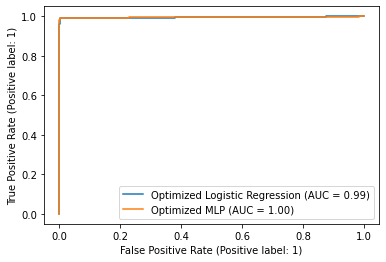

In [42]:
# ROC curves
ax = plt.axes()
plt2 = plot_roc_curve(log_grid.best_estimator_, X_test, y_test, ax = ax, name = "Optimized Logistic Regression")
plt4 = plot_roc_curve(mlp_grid.best_estimator_, X_test, y_test, ax = ax, name = "Optimized MLP")

--  Optimized Logistic Regression  --
Accuracy:  0.9988
Balanced Accuracy:  0.9936
Recall:  0.9878
Precision:  0.9878
Macro F1 score:  0.9936


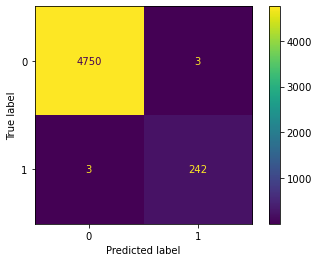

In [43]:
print_scores("Optimized Logistic Regression", log_grid.best_estimator_, y_test, X_test)

--  Optimized Multi-Layer Perceptron  --
Accuracy:  0.999
Balanced Accuracy:  0.9956
Recall:  0.9918
Precision:  0.9878
Macro F1 score:  0.9946


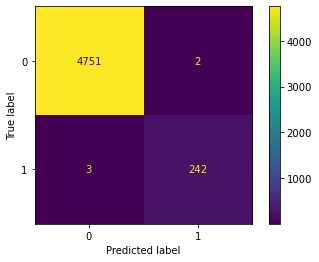

In [44]:
print_scores("Optimized Multi-Layer Perceptron", mlp_grid.best_estimator_, y_test, X_test)

## 7. Final recommendation of best model

### a) Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency (4 marks)

100-200 words


From a metric perspective, the Multi-Layer Perceptron model looks like a winner, but the two are really close.

What would tip me over to use MLP is the results I got from k-fold cross validation: we can consistently achieve higher scores on the whole dataset (with less variance in the scores). It also makes sense with the dataset we have: it's not unimaginable at all to think that a linear classifier like LR won't find the absolutely best decision boundary.

But metrics alone only tell part of the story.

### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective (4 marks)

100-200 words



Regarding model training, the longer training times of MLP classifier can be substantially sped up by running the calculations on a GPU, even for smaller networks as our model. The SKLearn library doesn't support that by default, but we can move the training / inference of the model to industry standard frameworks, like PyTorch or Tensorflow, which would make that possible. 

From an interpretation perspective, we may have an easier time visualizing the linear decision boundaries of Logistic Regression than getting a good understanding of the MLP's non-linear decision boundaries, which is something to consider in this decision.

From a technical perspective, the two are really close, with MLP performing better in the cross-validation phase.

But overall, Logistic Regression is a simpler model than an MLP with 3 hidden layers. Which could be an important decision factor when it comes to having a model in production.

With the data we have available, I'd recommend the optimized Logistic Regression model, as its performance is almost on par with the more complex MLP model, and there may not be enough evidence that its slight outperformance compensates for the added complexity.

With more data available, I'd re-evaluate this recommendation.


## 8. Conclusion

### a) What has been successfully accomplished and what has not been successful? (4 marks)
100-300 words

There is information missing that otherwise would be needed for full evaluation:
We don't know how many transactions there are in a year, and whether the normal / fraudulent transaction ratio is the same as in the dataset.

We could assume that the dataset is a full year's worth of transactions, although it seems unlikely that there are only 10,000 transactions processed in 12 months, and that 5% of those transactions being fraudulent.
If we went with the assumption, we could get a relatively good understanding how our model performs in the following year by multiplying the number of False Positives and False Negatives by two, as we've used a 50% train-test split ratio.

This would mean with our choice, the Logistic Regression model, we'd be over the budget that was set out in the beginning - but only slightly.
We'd have 6 False Positivies, costing £1k each, with the maximum of £30k. Here, we're good!
We'd also have 6 False Negatives, costing £10k each, with the maximum of £50k. Here, we're slightly over the budget.

At the same time, we satisfied the absolute minimum requirements that were set out: True Positive Rate of at least 90% and True Negative Rate of at least 70%.

Overall, we have a pretty good first step, and I'd move forward with the project, gather more data, and monitor the models's performance on that.

### b) Reflecting back on the analysis, what could you have done differently if you were to do the project again? (2 marks)

100-300 words

I'd have:
- posted a question about the transaction dataset (number of transactions per year, etc.) in time on the forum, that I based my final business evaluation on.
- tried oversampling the fraudulent transactions and see whether the results are any different - as well as potentially undersampling the normal transactions (although the dataset is quite small for that).
- used SKLearn pipelines throughout the project.

### c) Provide a wish list of future work that you would like to do (2 marks)

100-200 words

- I'd try more classifiers (Decision Trees, ensemble models like Gradient Boosting), as well as more hyperparameters, out of curiosity.
- I'd dig deeper into the evaluation of the models, inspect the 
- I'd try to ensemble multiple, different kind of classifiers with SKLearn's VotingClassifier class.
- I'd try to tweak the learning rate of the MLP classifier when doing grid search.